# About Cyclistic
Cyclistic is a bike-share offering launched in Chicago in 2016. Since then the program has grown to a fleet of 5,284 bicycles that are geotracked and locked into a network of 692 stations across the city.

Consumers can choose between different plans: full-day passes, single-ride passes or annual memeberships; those using the former two are referred as **Casual riders** whereas those who subscribe to an annual membership are **Cyclistic members**.


# Business Task
Cyclistic's finance analyst have concluded that annual members are much more profitable that casual riders and maximizing their number will be key for future growth. 

This report will thus aim at understanding the way annual members and casual rider use the service differently, identifying trends and relationships and ultimately **design a new market strategy** to convert casual riders into annual memebers. We will also test if the usage of the service can be predicted using Machine Learning techniques so to provide further insights and recommendations. 

# About the Data 
Data is provided by Motivate International Inc. under the following [license](https://ride.divvybikes.com/data-license-agreement). 
Data from the previous 12 months was gathered, processed and analyzed amounting to a total of 5 millions entries. 

Each spreadsheet contained: 
* **Ride_id**
* **Rideable_type**: either electric bike, classic bike or docked bike
* **Started_at / Ended_at**: time in which trip started and ended 
* **Start_Station_name / End_Station_name**
* **Start_latitude/Start_longitude/End_latitude/ End_longitude**
* **Membership status**: either casual or member 

## Cleaning ##
During the Cleaning phase of the 12 individual spreadsheets inconsistent formatting was fixed, empty cells were deleted and rows containing data not useful for the scope of the analysis were removed. 

Moreover with the goal of making the analyze phase more agile, the following new columns containing data extrapolated from the existing ones were added: 
* **Minutes** : trip duration in minutes
* **Day_of_week** : day of the week in which the ride occured 
* **Month** : integer from 1-12 to identify the month the data belonged even after being merged 
* **Season**
* **Start Hour**


In [2]:
#Load useful packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# If load from DataFrame
Jan  = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/January.csv')
Feb = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/February.csv')
Mar = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/March.csv')
Apr = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/April.csv')
May = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/May.csv')
Jun = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/June.csv')
Jul = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/July.csv')
Aug = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/August.csv')
Sep = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/September.csv')
Oct = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/October.csv')
Nov = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/November.csv')
Dec = pd.read_csv('../input/bikeshare-company-data-across-one-year/case_study/December.csv')

In [4]:
# If Load from SQL 
# import pandas as pd
# import sqlite3


# connection = sqlite3.connect('../bikeshare.db')


# Jan = pd.read_sql('SELECT * FROM January', connection)
# Feb = pd.read_sql('SELECT * FROM February', connection)
# Mar = pd.read_sql('SELECT * FROM March', connection)
# Apr = pd.read_sql('SELECT * FROM April', connection)
# May = pd.read_sql('SELECT * FROM May', connection)
# Jun = pd.read_sql('SELECT * FROM June', connection)
# Jul = pd.read_sql('SELECT * FROM July', connection)
# Aug = pd.read_sql('SELECT * FROM August', connection)
# Sep = pd.read_sql('SELECT * FROM September', connection)
# Oct = pd.read_sql('SELECT * FROM October', connection)
# Nov = pd.read_sql('SELECT * FROM November', connection)
# Dec = pd.read_sql('SELECT * FROM December', connection)


# connection.close()


In [5]:
print(Nov.head())
print(Nov.columns)
print(Nov.describe())

   rideable_type        started_at          ended_at member_casual  \
0  electric_bike  27/11/2021 13:27  27/11/2021 13:46        casual   
1  electric_bike  27/11/2021 13:38  27/11/2021 13:56        casual   
2  electric_bike  26/11/2021 22:03  26/11/2021 22:05        casual   
3  electric_bike  27/11/2021 09:56  27/11/2021 10:01        casual   
4  electric_bike  26/11/2021 19:09  26/11/2021 19:30        casual   

  ride_length  day_of_week  start_hour  season  month  minutes  
0    00:19:00            7          13       3     11       19  
1    00:17:45            7          13       3     11       17  
2    00:02:22            6          22       3     11        2  
3    00:05:01            7           9       3     11        5  
4    00:21:13            6          19       3     11       21  
Index(['rideable_type', 'started_at', 'ended_at', 'member_casual',
       'ride_length', 'day_of_week', 'start_hour', 'season', 'month',
       'minutes'],
      dtype='object')
         da

In [6]:
complete_data = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec], ignore_index=True)
print(complete_data.head())
print(complete_data.columns)
print(complete_data.info())

   rideable_type        started_at          ended_at member_casual  \
0  electric_bike  13/01/2022 11:59  13/01/2022 12:02        casual   
1  electric_bike  10/01/2022 08:41  10/01/2022 08:46        casual   
2   classic_bike  25/01/2022 04:53  25/01/2022 04:58        member   
3   classic_bike  04/01/2022 00:18  04/01/2022 00:33        casual   
4   classic_bike  20/01/2022 01:31  20/01/2022 01:37        member   

  ride_length  day_of_week  start_hour  season  month  minutes  season   
0    00:02:57            5          11     4.0      1      2.0      NaN  
1    00:04:21            2           8     4.0      1      4.0      NaN  
2    00:04:21            3           4     4.0      1      4.0      NaN  
3    00:14:56            3           0     4.0      1     14.0      NaN  
4    00:06:02            5           1     4.0      1      6.0      NaN  
Index(['rideable_type', 'started_at', 'ended_at', 'member_casual',
       'ride_length', 'day_of_week', 'start_hour', 'season', 'month'

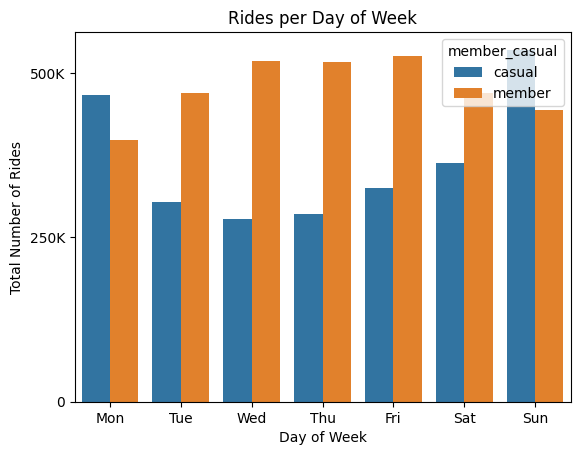

In [7]:
day_of_week_data = complete_data.groupby(['member_casual', 'day_of_week']).size().reset_index(name='total')
sns.barplot(data=day_of_week_data, x='day_of_week', y='total', hue='member_casual', dodge=True)
plt.xlabel('Day of Week')
plt.ylabel('Total Number of Rides')
plt.title('Rides per Day of Week')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.yticks(ticks=[0, 250000, 500000], labels=["0", "250K", "500K"])
plt.show()

This first chart showcases the number of rides occured in each day of the week, it's clear that casual riders use the service more during the weekend as opposed to members whose numbers are higher across the working week.

A possible explanation is that casual members use the service for leisure whereas members ride to work, to find evidence of our hypothesis we plot in the following graph the numbers of rides occured at each hour of the day.

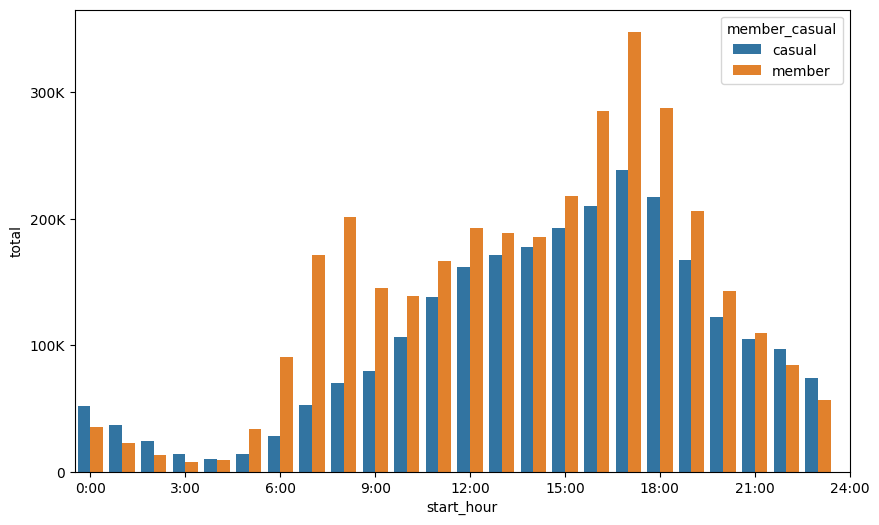

In [8]:
hourly_data = complete_data.groupby(['start_hour', 'member_casual']).size().reset_index(name='total')
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_data, x='start_hour', y='total', hue='member_casual', dodge=True)

plt.yticks(ticks=[0, 100000, 200000, 300000], labels=["0", "100K", "200K", "300K"])
plt.xticks(ticks=[0, 3, 6, 9, 12, 15, 18, 21, 24], labels=["0:00", "3:00", "6:00", "9:00", "12:00", "15:00", "18:00", "21:00", "24:00"])
plt.xlabel('start_hour')
plt.ylabel('total')

plt.show()

* The above graph indeed confirms our findings, in fact rides from members peak at 7:00 and 8:00 and at between 16:00 and 18:00, which are the moments of the day when people commute for work

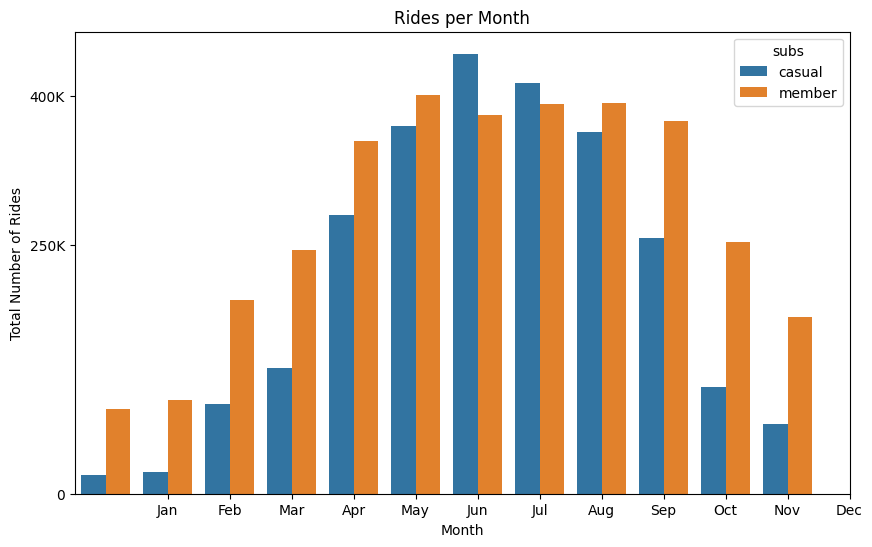

In [9]:
# Step 1: Group by 'member_casual' and 'month' and calculate the total rides
monthly_data = complete_data.groupby(['member_casual', 'month']).size().reset_index(name='total')

# Step 2: Create the plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_data, x='month', y='total', hue='member_casual', dodge=True)

# Step 3: Customize the y-axis and x-axis labels
plt.yticks(ticks=[0, 250000, 400000], labels=["0", "250K", "400K"])
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Step 4: Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Number of Rides')
plt.title('Rides per Month')
plt.legend(title='subs')

# Step 5: Show the plot
plt.show()

From the above graph showing the number of rides per months we understand that casual riders peak during the summer months. 

Thus a possible market strategy could be implementing a **summer membership**, to see how the volume during the summer compares to other periods we analyze the data seasonally in the following graph. 

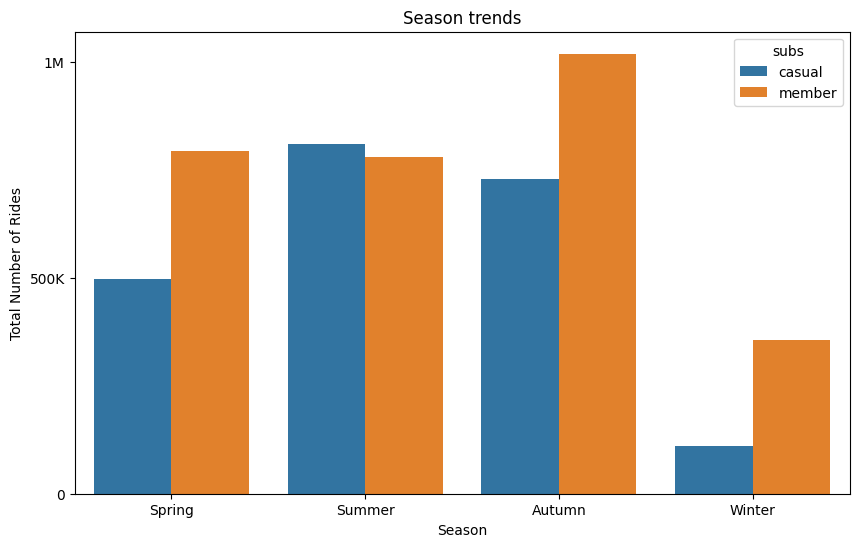

In [10]:
# Group by 'member_casual' and 'season' and calculate the total rides
seasonal_data = complete_data.groupby(['member_casual', 'season']).size().reset_index(name='total')
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data, x='season', y='total', hue='member_casual', dodge=True)

plt.yticks(ticks=[0, 500000, 1000000], labels=["0", "500K", "1M"])
plt.xticks(ticks=[0, 1,2, 3], labels=["Spring", "Summer", "Autumn", "Winter"])

plt.xlabel('Season')
plt.ylabel('Total Number of Rides')
plt.title('Season trends')
plt.legend(title='subs')
plt.show()

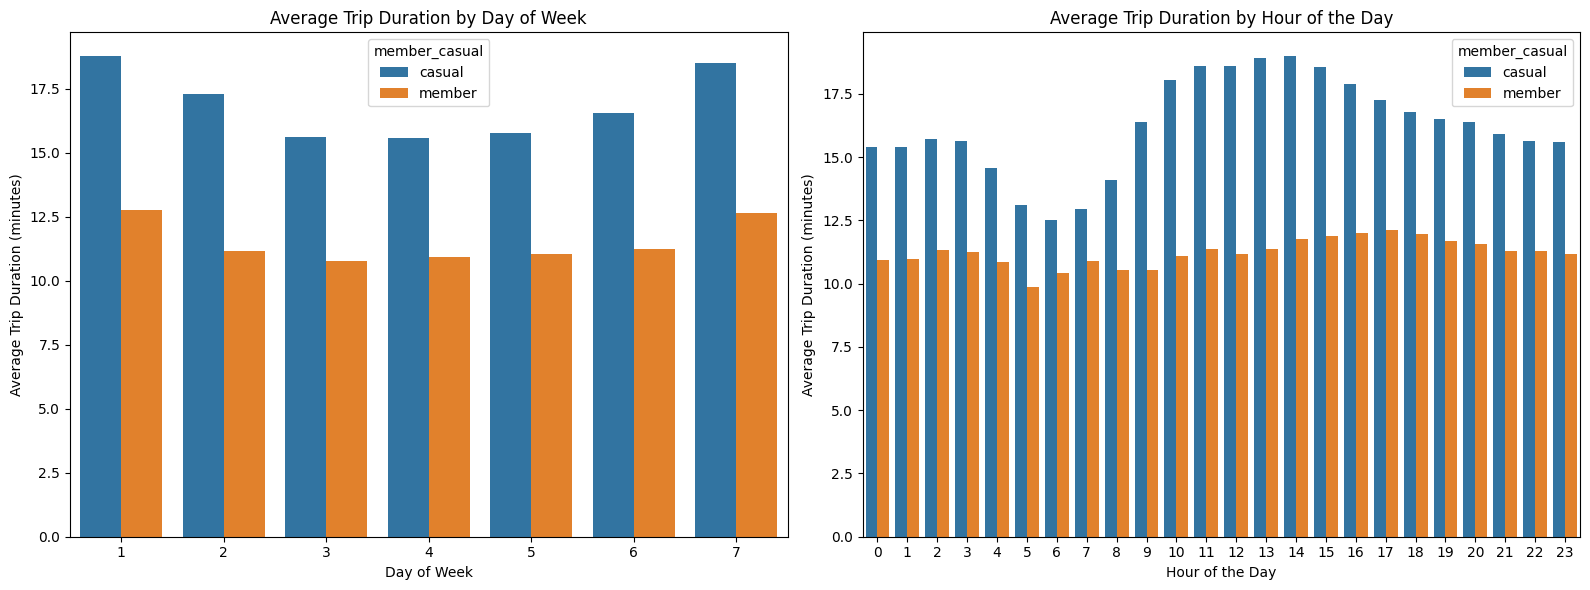

In [11]:
day_of_week_data = complete_data.groupby(['member_casual', 'day_of_week']).agg(total=('minutes', 'size'), average=('minutes', 'mean')).reset_index()


hourly_data = complete_data.groupby(['member_casual', 'start_hour']).agg(total=('minutes', 'size'), average=('minutes', 'mean')).reset_index()


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=day_of_week_data, x='day_of_week', y='average', hue='member_casual', dodge=True, ax=axes[0])
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Average Trip Duration (minutes)')
axes[0].set_title('Average Trip Duration by Day of Week')

sns.barplot(data=hourly_data, x='start_hour', y='average', hue='member_casual', dodge=True, ax=axes[1])
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Trip Duration (minutes)')
axes[1].set_title('Average Trip Duration by Hour of the Day')
plt.tight_layout()

plt.show()

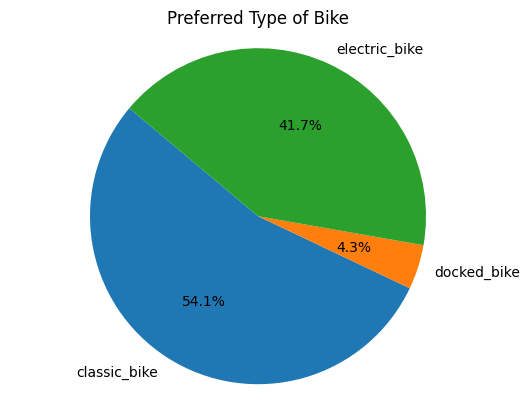

In [12]:
#(EXTRA) which type of bike is preferred?
bike_preference = complete_data.groupby('rideable_type').size().reset_index(name='total')
plt.pie(bike_preference['total'], labels=bike_preference['rideable_type'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Preferred Type of Bike')
plt.show()

#both casual and members prefer classic bikes and the docked type are the least used

## Predict using Random Forest

We now use Random Forest to understand whether the use of Machine Learning models can help us forecast service usage across casual and members riders. 

We perform data conversion to the appropriate type and Feature Engineering to encode temporal information, including for instance **weekly rolling average**.

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [14]:
df = complete_data

In [15]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%d/%m/%Y %H:%M')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%d/%m/%Y %H:%M')

In [16]:
df['hour'] = df['started_at'].dt.hour
df['day'] = df['started_at'].dt.day
df['month'] = df['started_at'].dt.month
df['day_of_week'] = df['started_at'].dt.dayofweek


In [17]:
df['is_casual'] = df['member_casual'].apply(lambda x: 1 if x == 'casual' else 0)
daily_usage = df.groupby(['started_at', 'member_casual']).size().unstack(fill_value=0)
daily_usage['total_rides'] = daily_usage['casual'] + daily_usage['member']


In [18]:
daily_usage = daily_usage.resample('D').sum()  # Resampling the data daily


In [19]:
daily_usage = daily_usage.fillna(0)

In [20]:
daily_usage['casual_lag_1'] = daily_usage['casual'].shift(1)
daily_usage['member_lag_1'] = daily_usage['member'].shift(1)

In [21]:
daily_usage['casual_rolling_mean_7'] = daily_usage['casual'].rolling(window=7).mean()
daily_usage['member_rolling_mean_7'] = daily_usage['member'].rolling(window=7).mean()

In [22]:
daily_usage = daily_usage.dropna()

In [23]:
train = daily_usage[daily_usage.index < '2021-09-01']
test = daily_usage[daily_usage.index >= '2022-06-01']


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Shift the target column to match the lag features
train['total_rides_shifted'] = train['total_rides'].shift(-1)  # Shift target back by 1 day

# Drop rows with NaN in the 'total_rides_shifted' column
train = train.dropna(subset=['total_rides_shifted'])

# Define the features and train the model
features = ['casual_lag_1', 'member_lag_1', 'casual_rolling_mean_7', 'member_rolling_mean_7']
rf_model = RandomForestRegressor()
rf_model.fit(train[features], train['total_rides_shifted'])

# Predict on the test set
test_predictions = rf_model.predict(test[features])



/tmp/ipykernel_17/3516371817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total_rides_shifted'] = train['total_rides'].shift(-1)  # Shift target back by 1 day


In [25]:

features = ['casual_lag_1', 'member_lag_1', 'casual_rolling_mean_7', 'member_rolling_mean_7']
rf_model = RandomForestRegressor()
rf_model.fit(train[features], train['total_rides'])



RandomForestRegressor()

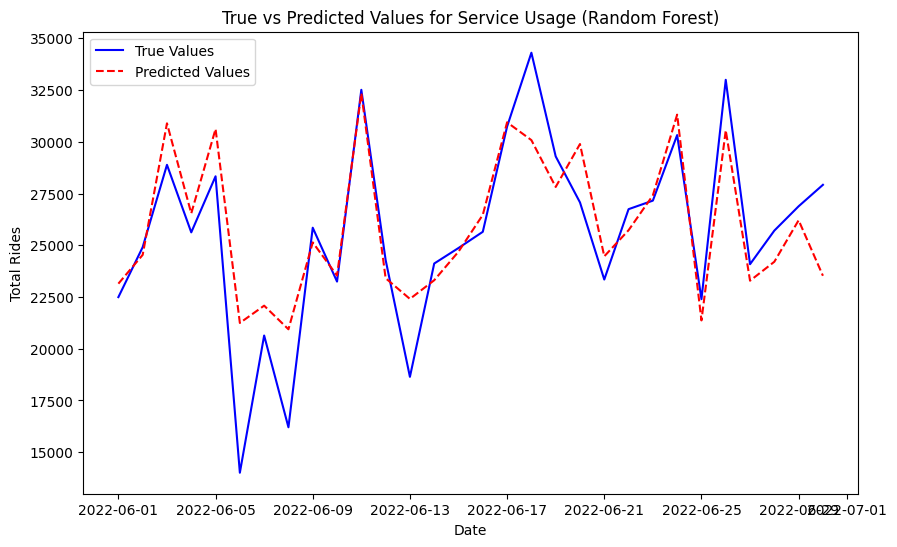

In [26]:
# Predicting on the test set
test_predictions = rf_model.predict(test[features])

# Let's visualize the predicted values against the actual values
import matplotlib.pyplot as plt

# Plotting true values vs predicted values
plt.figure(figsize=(10, 6))


plt.plot(test.index, test['total_rides'], label='True Values', color='blue')
#plt.plot(test.index, test_predictions, label='Predicted Values', color='red', linestyle='--')
shifted_predictions = np.roll(test_predictions, -1)
plt.plot(test.index, shifted_predictions, label='Predicted Values', color='red', linestyle='--')




plt.title('True vs Predicted Values for Service Usage (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.legend()

plt.show()


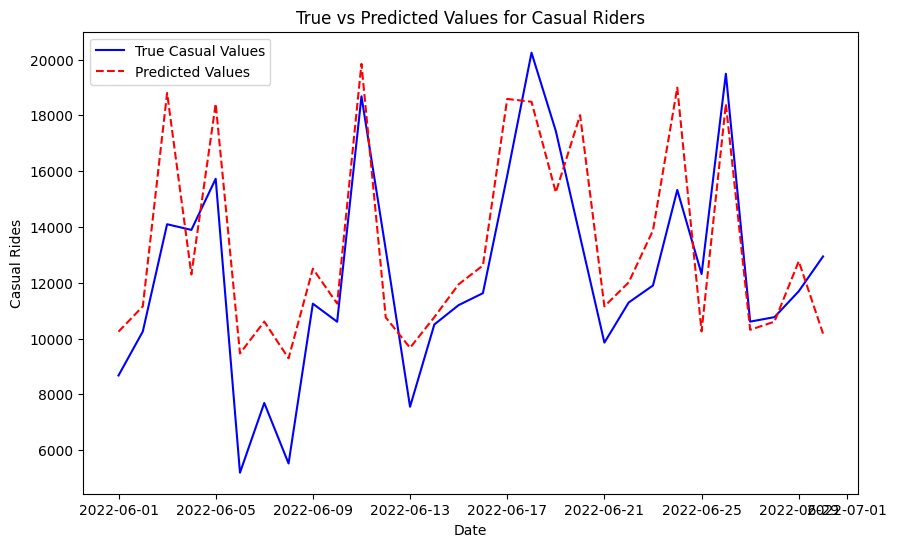

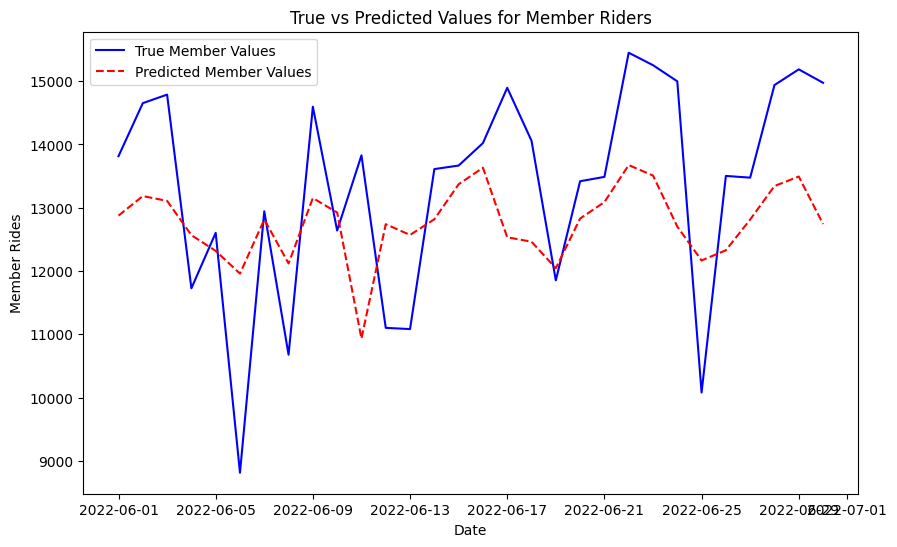

In [27]:
# Train a Random Forest model for casual riders
rf_model_casual = RandomForestRegressor()
rf_model_casual.fit(train[features], train['casual'])

# Train a Random Forest model for member riders
rf_model_member = RandomForestRegressor()
rf_model_member.fit(train[features], train['member'])

# Predict on the test set
casual_predictions = rf_model_casual.predict(test[features])
member_predictions = rf_model_member.predict(test[features])

# Visualize the predictions
import matplotlib.pyplot as plt

# Plotting casual riders
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['casual'], label='True Casual Values', color='blue')
shifted_predictions = np.roll(casual_predictions, -1)
plt.plot(test.index, shifted_predictions, label='Predicted Values', color='red', linestyle='--')
plt.title('True vs Predicted Values for Casual Riders')
plt.xlabel('Date')
plt.ylabel('Casual Rides')
plt.legend()
plt.show()

# Plotting member riders
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['member'], label='True Member Values', color='blue')
member_predictions = np.roll(member_predictions, -1)
plt.plot(test.index, member_predictions, label='Predicted Member Values', color='red', linestyle='--')
plt.title('True vs Predicted Values for Member Riders')
plt.xlabel('Date')
plt.ylabel('Member Rides')
plt.legend()
plt.show()


In [28]:
# Calculate MAE and RMSE for casual riders
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_casual = mean_absolute_error(test['casual'], shifted_predictions)
rmse_casual = np.sqrt(mean_squared_error(test['casual'], shifted_predictions))

# Calculate MAE and RMSE for member riders
mae_member = mean_absolute_error(test['member'], member_predictions)
rmse_member = np.sqrt(mean_squared_error(test['member'], member_predictions))

# Print the results
print(f'Casual Riders - MAE: {mae_casual}, RMSE: {rmse_casual}')
print(f'Member Riders - MAE: {mae_member}, RMSE: {rmse_member}')


Casual Riders - MAE: 1940.022666666667, RMSE: 2308.712839648968
Member Riders - MAE: 1318.5419999999997, RMSE: 1545.5110152287277


# Our Findings
1. Casual riders use the service more during the week-end
2. Casual riders peak during the summer months
3. Casual riders on average use the service for more time each ride 
4. There is no difference in the preference of bike used between members and casual riders.


# What to do going forward?

*The report suggests to adopt the following market strategies:*

* Implement a seasonal membership to maximize the revenue coming from casual riders in the summer that can then be extended for the entire year.
* Effectively advertise through media platforms the benefits that the fixed cost of a membership would bring as opposed to the time-dependent fee applied to casual users, as their average ride is longer. 
